## Curve fitting
Through curve fitting exercise, you will understand the basics of regression.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import random

import default_settings as default

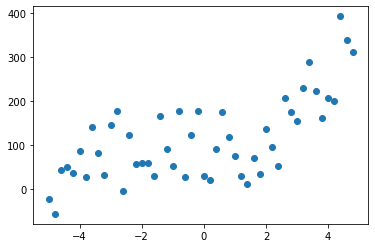

In [2]:
# load samples.
with open('data/regression_samples.txt') as f:
    lines = f.read().split('\n')
X = [float(line.split()[0]) for line in lines if len(line.split()) > 0]
Y = [float(line.split()[1]) for line in lines if len(line.split()) > 0]

X = np.array(X)
Y = np.array(Y)
# display the points.
plt.scatter(X, Y)


## problem description
You will find a curve that fit the above scatter the best.   
Let's assume the curve is described as: f(x, w) = a + b * x + c * x^2 + d * x^3.  
Your task is to find w = [a, b, c, d].   
  
Here is our approach.  

1. Initialize w with some numbers.
2. Calculate how good f(x, w) fits the scatters by defining the cost function. For now, cost function is the root mean square error devided by the number of points. 
3. Update w using gradient descent, until the cost becomes small enough. 

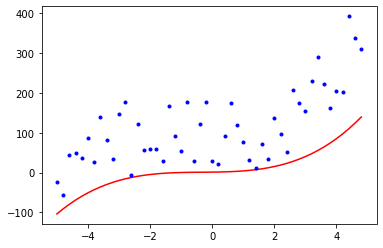

In [3]:
# initilize w.
w = [1, 1, 1, 1]

# define function. 
def f_(x, w):
    ### WRITE YOUR OWN CODES ### 
    #y = w[0] + w[1] * x + w[2] * np.power(x,2) + w[3] * np.power(x,3)
    y = w[0] + w[1] * x + w[2] * x ** 2 + w[3] * x ** 3
    
    return y


# calculate predictions y
Y_predict = f_(X, w)
# display the points.
plt.plot(X,Y_predict,'r-')
plt.plot(X,Y,'b.')
plt.show()


In [4]:
# define cost function.
def cost_function(w, X, Y):
    ### WRITE YOUR OWN CODES ### 
    m = len(Y)
    
    Y_predict = f_(X, w)
    cost = (1/(2*m)) * np.sum(np.square(Y_predict-Y))
    
    return cost


In [5]:
cost = cost_function(w, X, Y)
print(cost)


7820.013331528799


In [6]:
# update w using gradient descent. 
def update_w(w, X, Y, learning_rate=0.01, iterations=100):
    ### WRITE YOUR OWN CODES ### 
    m = len(Y)
    cost_history = np.zeros(iterations)
    w_history = np.zeros((iterations,4))
    
    for it in range(iterations):
        
        Y_predict = f_(X, w)
        
        w = w -(1/m)*learning_rate*( X.T.dot((Y_predict - Y)))
        w_history[it,:] =w.T
        cost_history[it]  = cost_function(w,X,Y)
    
    return w, cost_history, w_history


In [7]:
print(w)
learning_rate = 0.005
iteration = 1000

w0, cost_history, w_history = update_w(w, X, Y, learning_rate, iteration)
print(w0)


[1, 1, 1, 1]
[1.29060031 1.29060031 1.29060031 1.29060031]


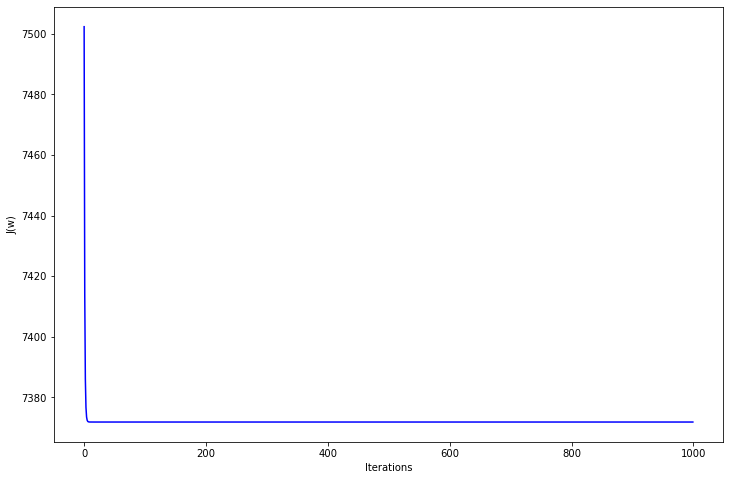

In [8]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('J(w)')
ax.set_xlabel('Iterations')
_=ax.plot(range(iteration),cost_history,'b-')


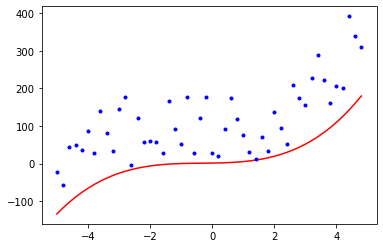

In [9]:
# calculate predictions y
Y_predict2 = f_(X, w0)
# display the points.
plt.plot(X,Y_predict2,'r-')
plt.plot(X,Y,'b.')
plt.show()


[ 1.82462548  4.25468041 -4.86778247 82.8907388 ]


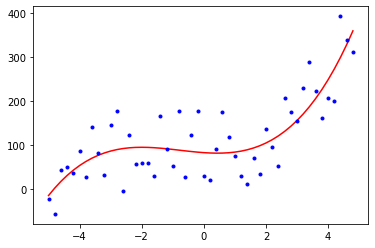

In [10]:
# Test existing function
coe = np.polyfit(X, Y, 3)
print(coe)
Y_fit = coe[0] * X ** 3 + coe[1] * X ** 2 + coe[2] * X + coe[3]
plt.plot(X,Y_fit,'r-')
plt.plot(X,Y,'b.')
plt.show()